![Risk](img/Risk.png)

## Assignment 5 Risk

The program should simulate 1000 individual battle rounds in Risk (3 attackers vs 2 defender) and plot the result.

For extra marks: a more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

### Rules of Risk

In Risk one army fights another using 6 sided dice.

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll).
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher).
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest).
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher).

Author: Irene Kilgannon

In [1]:
# Import modules
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The defender lost the battle.
 Attackers Losses: 940
 Defenders Losses: 1060


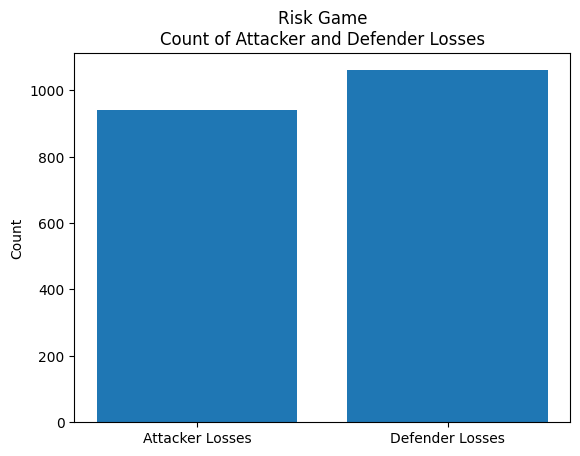

In [2]:

def roll_dice(num_dice):
    '''A function to simulate the rolling of any number of dice and create a list of the results of the dice rolls, sorted in descending order.
    Arguments: 
        num_dice (integer): the number of dice to roll.'''
    
    # Simulate the dice rolls
    roll_results = [random.randint(1, 6) for _ in range(num_dice)]

    # Return a list sorted in descending order.
    return sorted(roll_results, reverse=True)


def calculate_losses(attacker_dice, defender_dice):
    '''A function to compare the dice values of the attacker and the defender for each round. To keep track of the round losses the values are added to a list.
    Arguments: 
        attacker_dice: 
        defender_dice: 
    '''

    # Counter to keep track of the losses in a round
    round_attacker_losses = 0
    round_defender_losses = 0

    # 
    for a, d in zip(attacker_dice, defender_dice):
        if  a <= d:
            round_attacker_losses += 1
        else:
            round_defender_losses += 1

    return round_attacker_losses, round_defender_losses


def simulate_battle(num_rounds):
    '''Simulate the a battle
    Argument: 
        num_rounds: Integer, the number of battle rounds to simulate.'''

    # Lists to keep track of the overall looser.
    attacker_losses = 0
    defender_losses = 0

    # A list of a dictionary to keep track of the round number, dice rolls and the score for each round.
    round_scores = []

    # Play the game
    for round in range(1, num_rounds + 1):
        # Roll the attacker dice
        attacker_dice = roll_dice(3)

        # Roll the defender dice
        defender_dice = roll_dice(2)

        # Use calculate_losses function.
        round_attacker_losses, round_defender_losses = calculate_losses(attacker_dice, defender_dice)

        # Add 
        attacker_losses += round_attacker_losses
        defender_losses += round_defender_losses
        
    	# 
        round_scores.append({
            'round': round,
            'attacker_dice': attacker_dice,
            'defender_dice': defender_dice,
            'attacker_losses': round_attacker_losses,
            'defender_losses': round_defender_losses})

    return attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores


def plot_results(attacker_losses, defender_losses):
    '''A function to create a bar plot of the total number of losses for the attacker and defender.'''

    if attacker_losses > defender_losses:
        print(f'The attacker lost the battle.\n Attackers Losses: {attacker_losses}\n Defenders Losses: {defender_losses}')
    else:
        print(f'The defender lost the battle.\n Attackers Losses: {attacker_losses}\n Defenders Losses: {defender_losses}')

    y = np.array([attacker_losses, defender_losses])
    x = np.array(['Attacker Losses', 'Defender Losses'])

    plt.bar(x, y)

    plt.ylabel('Count')
    plt.title('Risk Game\nCount of Attacker and Defender Losses')
    plt.show()


# https://realpython.com/python-return-statement/#returning-multiple-values

attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores = simulate_battle(1000)

#display_results( attacker_losses, defender_losses)
plot_results(attacker_losses, defender_losses)

In [3]:
# Convert round_scores to a dataframe

round_scores = pd.DataFrame(round_scores)
print(round_scores.head())


   round attacker_dice defender_dice  attacker_losses  defender_losses
0      1     [6, 3, 1]        [5, 1]                0                2
1      2     [3, 2, 2]        [3, 3]                2                0
2      3     [5, 3, 1]        [4, 3]                1                1
3      4     [6, 5, 1]        [4, 4]                0                2
4      5     [5, 5, 1]        [3, 2]                0                2


In [4]:
round_scores = round_scores.set_index('round')
round_scores.head()

,attacker_dice,defender_dice,attacker_losses,defender_losses
round,,,,
1,"[6, 3, 1]","[5, 1]",0,2
2,"[3, 2, 2]","[3, 3]",2,0
3,"[5, 3, 1]","[4, 3]",1,1
4,"[6, 5, 1]","[4, 4]",0,2
5,"[5, 5, 1]","[3, 2]",0,2


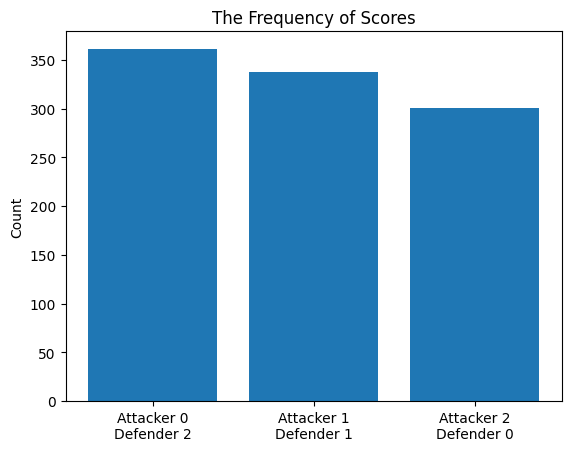

attacker_losses
0    361
1    338
2    301
Name: count, dtype: int64


In [5]:
# what i want to do is do a frequency of the round wins.
y = np.array(round_scores['attacker_losses'].value_counts())

x = np.array(['Attacker 0\nDefender 2', 'Attacker 1\nDefender 1', 'Attacker 2\nDefender 0'])

plt.bar(x, y)
plt.title('The Frequency of Scores')
plt.ylabel('Count')
plt.show()

print(round_scores['attacker_losses'].value_counts())

For extra marks: a more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

any no of armies? Ask player how many armies they would like, or computer decide how many to play with. 
start with x no of armies for attacker, y for defender.

attacker_army_size: 6
defender_army_size: 0
attacker losses:24
defender losses:30
[{'round': 1, 'attacker_dice': [5, 4, 4], 'defender_dice': [5, 2], 'attacker_losses': 1, 'defender_losses': 1, 'attacker_army_size': 29, 'defender_army_size': 29}, {'round': 2, 'attacker_dice': [5, 4, 2], 'defender_dice': [5, 1], 'attacker_losses': 2, 'defender_losses': 2, 'attacker_army_size': 28, 'defender_army_size': 28}, {'round': 3, 'attacker_dice': [3, 3, 1], 'defender_dice': [4, 2], 'attacker_losses': 3, 'defender_losses': 3, 'attacker_army_size': 27, 'defender_army_size': 27}, {'round': 4, 'attacker_dice': [4, 4, 1], 'defender_dice': [5, 5], 'attacker_losses': 5, 'defender_losses': 3, 'attacker_army_size': 25, 'defender_army_size': 27}, {'round': 5, 'attacker_dice': [5, 5, 1], 'defender_dice': [6, 4], 'attacker_losses': 6, 'defender_losses': 4, 'attacker_army_size': 24, 'defender_army_size': 26}, {'round': 6, 'attacker_dice': [5, 3, 2], 'defender_dice': [3, 2], 'attacker_losses': 6, 'defender_loss

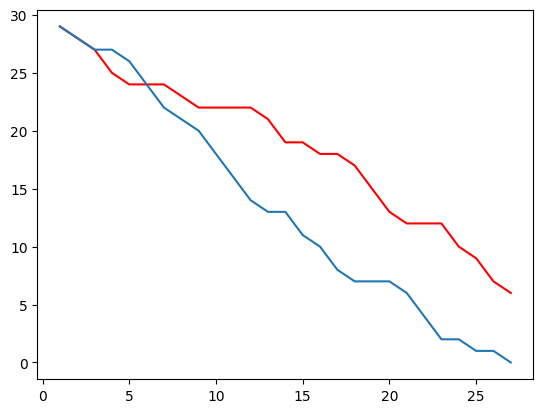

In [16]:
# Very very basic version with an army size initialised at start of battle. 
round_attacker_losses = 0
round_defender_losses = 0
    
attacker_army_size = 30
defender_army_size = 30


attacker_losses = 0
defender_losses = 0

round_scores = []

for round in range(1, 1000):
    # Roll the attacker dice
    attacker_dice = roll_dice(3)
    # Roll the defender dice
    defender_dice = roll_dice(2)
    # Calculate the losses.
    for a, d in zip(attacker_dice, defender_dice):
        if  a <= d:
            round_attacker_losses += 1
            attacker_army_size -=1
        else:
            round_defender_losses += 1
            defender_army_size -= 1

    attacker_losses += round_attacker_losses
    defender_losses += round_defender_losses
        
    #
    round_scores.append({
        'round': round,
        'attacker_dice': attacker_dice,
        'defender_dice': defender_dice,
        'attacker_losses': round_attacker_losses,
        'defender_losses': round_defender_losses,
        'attacker_army_size': attacker_army_size,
        'defender_army_size':defender_army_size})
    
    if attacker_army_size == 0 or defender_army_size == 0:
        break

print(f'attacker_army_size: {attacker_army_size}')

print(f'defender_army_size: {defender_army_size}')

print(f'attacker losses:{round_attacker_losses}')

print(f'defender losses:{round_defender_losses}')

print(round_scores)

# Plot the army size as the rounds progress.
round_scores = pd.DataFrame(round_scores)
print(round_scores.head())

plt.plot(round_scores['round'], round_scores['attacker_army_size'], color = 'r')
plt.plot(round_scores['round'], round_scores['defender_army_size'])
plt.show()

__References__





 https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

 Sort vs sorted https://www.w3schools.com/python/numpy/numpy_array_sort.asp Sort returns a copy leaving the original untouched.
 
 https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order